----
# Analysis of the SA optimization
----

We optimized Tree-Tensor Networks (TNNs) using Simulated Annealing (SA).  
Here we visalize and analyze the results.

Date and content of runs:
- `2023-10-05`: small run to test the notebook. No MPI parallelization.
- `TEST`: small test with MPI parallelization (performed on 2023-11-27).
- `2023-11-27`: run for data collection. With MPI parallelization.

Sections:
- <a href=#load>Load the dataframe</a>
- <a href=#next>WIP</a>

----
<a id='top'></a>

In [2]:
# Set working directory to be the main directory of the repo.
import os
#try:
#    was_cwd_initialized
#except NameError:
#    os.chdir('ttn_learning/')
#    was_cwd_initialized = True
print('working directory:', os.getcwd())

import numpy as np              # Import NumPy library
import matplotlib.pyplot as plt # Import graphical library for plots
import pandas as pd
import sys
sys.path.insert(0, 'ttn_demo')
sys.path.insert(0, 'ttn_learning')
import ttn
# For certain runs, there is no way to know the slurm_jobid and slurm_procid if not manually.
from analysis_utils import get_id_of_files

# Name of files and directories
today = 'TEST'
today = '2023-11-27'
data_path = f'ttn_learning/data/{today}_TTN_SA'

working directory: /Users/matthewthibodeau/Intel/pando-TN


<a id='load'></a>

----
## Load the dataframe and visualize its content

<a href=#top>Back to top</a>

In [9]:
L = 24
site_dim = 2
bond_size = 3
run = 43

slurm_jobid, slurm_procid = get_id_of_files(today, L, site_dim, bond_size, run)
if today == '2023-10-05':
    file_id =  f'TTN_SA_{slurm_jobid}_{slurm_procid}_{run}_L{L}_D{site_dim}'
else:
    file_id =  f'TTN_SA_{slurm_jobid}_{slurm_procid}_{run}_L{L}_D{site_dim}_m{bond_size}'

with open(f'{data_path}/{file_id}_summary.pkl', 'rb') as f:
    df = pd.read_pickle(f)
with open(f'{data_path}/{file_id}_hamiltonian_vals.pkl', 'rb') as f:
    hamvals = pd.read_pickle(f)
print(df)

# get adjacency matrix
adj_matrix = df['state'][0].get_adjacency_matrix()

print(isinstance(df['state'][1], ttn.TTN))
print(isinstance(df['state'][2], ttn.TTN))

                                                  state     energy
0     TTN([\n    Tensor(shape=(2, 2), inds=('p23', '... -15.672545
1                                                  None -15.660965
2                                                  None -15.668069
3                                                  None -15.667615
4                                                  None -15.643883
...                                                 ...        ...
996                                                None -15.654151
997                                                None -15.671595
998                                                None -15.679244
999                                                None -15.682915
1000                                               None -15.674528

[1001 rows x 2 columns]
[-0.07413152  0.28808127 -0.24519804  2.18659522  0.32049366  2.30855893
  1.31402131  0.23527609  1.82020611  1.58491017  2.66789475  1.5197046
  3.23213485  0.65234397  


Num accepted SA moves: 121/1001 = 12.09 %


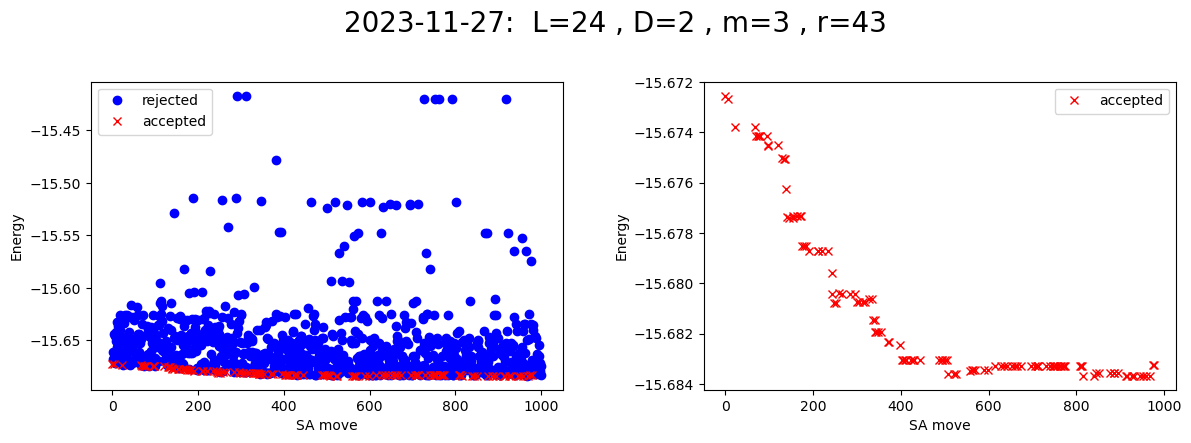

In [17]:
# To focus on the accepted moves, set the variable below:
only_accepted = True

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
plt.subplots_adjust(wspace=0.3)
plt.suptitle(f'{today}:  L={L} , D={site_dim} , m={bond_size} , r={run}', fontsize=20, y=1.06)


# Plot the data with 'o' marker for states where 'state' is None
ax1.plot(df.index[~df['state'].notna()], df['energy'][~df['state'].notna()],
        marker='o', linestyle='', color='b', label='rejected')
# Plot the data with 'x' marker for accepted states
ax1.plot(df.index[df['state'].notna()], df['energy'][df['state'].notna()],
        marker='x', linestyle='', color='r', label='accepted')
ax2.plot(df.index[df['state'].notna()], df['energy'][df['state'].notna()],
        marker='x', linestyle='', color='r', label='accepted')

ax1.set_xlabel('SA move'); ax1.set_ylabel('Energy'); ax1.legend()
ax2.set_xlabel('SA move'); ax2.set_ylabel('Energy'); ax2.legend()

# Count how many SA moves were accepted/rejected.
num_accepted = len(df.index[df['state'].notna()])
num_rejected = len(df.index[~df['state'].notna()])
print(f'\nNum accepted SA moves: {num_accepted}/{num_accepted+num_rejected} = {num_accepted/(num_accepted+num_rejected)*100:5.2f} %')
plt.show()

Generate the Hamiltonian values / TTN state adjacency matrices for learning

In [ ]:
L = 24


----
## END
----